In [1]:
"""
Words...

CRUELTY
CUTLERY
CUTELY
RELUCT

"""

'\nWords...\n\nCRUELTY\nCUTLERY\nCUTELY\nRELUCT\n\n'

In [2]:
import cv2
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import joblib
#from google.colab import drive
import shutil
from PIL import Image,ImageOps

In [3]:
IMAGE_WIDTH = IMAGE_HEIGHT = 28
CHANNELS = 3

In [4]:
#drive.mount('/content/gdrive')
#path = '/content/gdrive/My Drive/Handwritten Recognizer/'
#path = os.getcwd()

In [5]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14,14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig,ax

In [29]:
image = cv2.imread('check_images/8.jpg')
image = cv2.resize(image, (256,256))

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9c811833c8>)

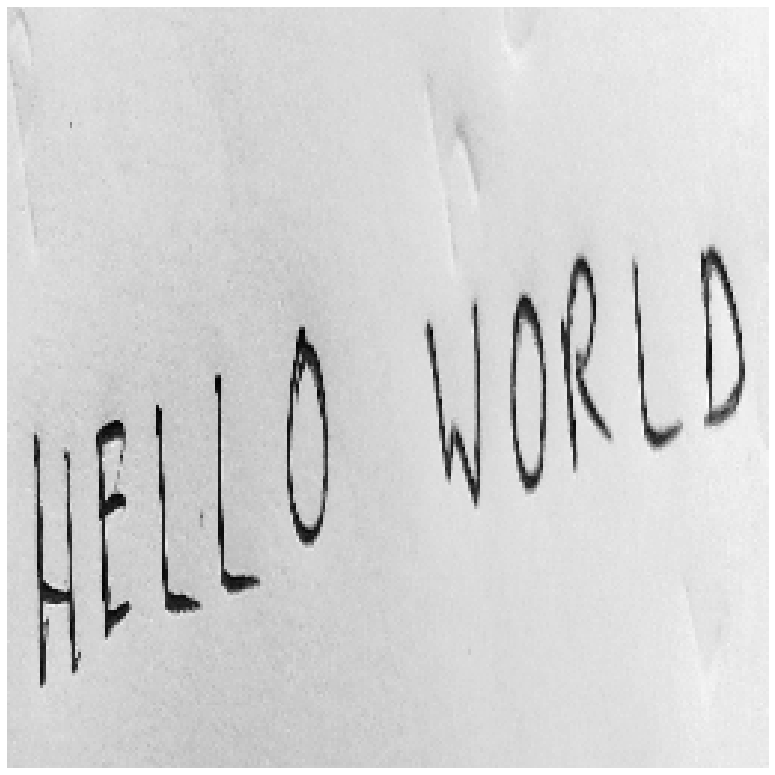

In [30]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_show(gray)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9c83f98bc8>)

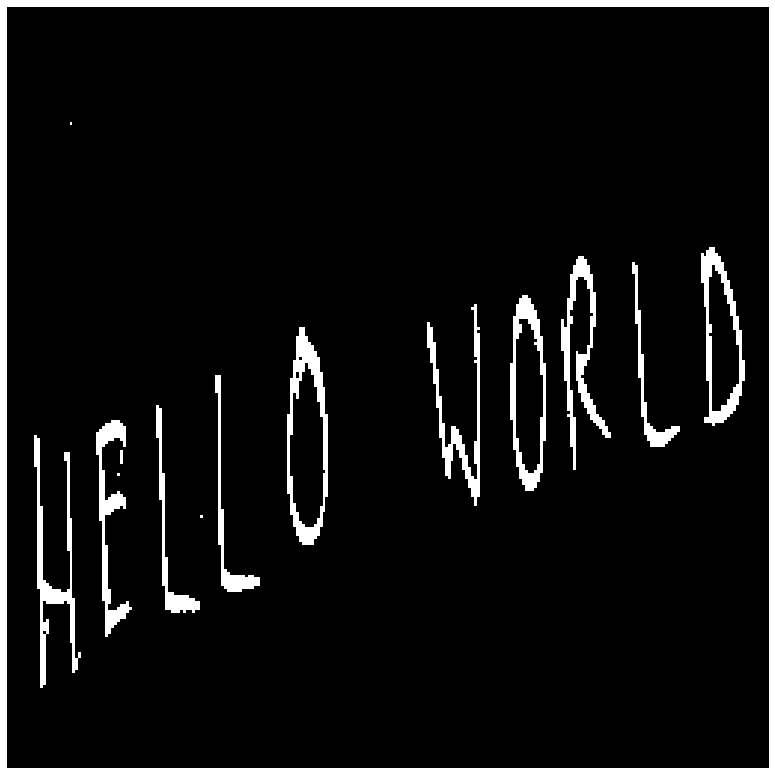

In [31]:
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY_INV)
image_show(thresh)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9c8eacf408>)

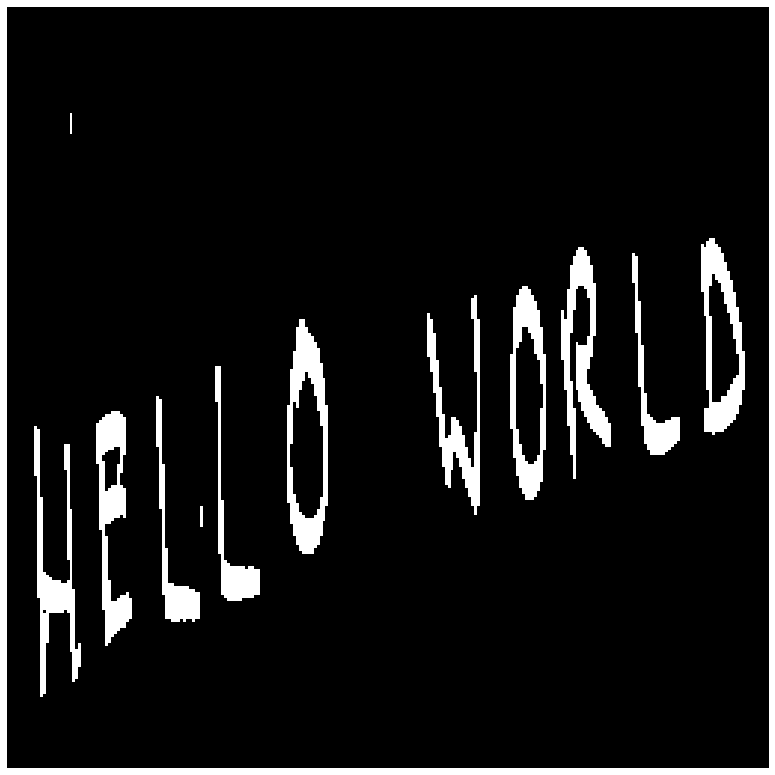

In [49]:
# dilation
kernel = np.ones((7, 1), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1)
#img_dilation = thresh
image_show(img_dilation)

In [50]:
temp_img = cv2.bitwise_not(img_dilation)
#image_show(img_dilation)

In [51]:
# find contours
# cv2.findCountours() function changed from OpenCV3 to OpenCV4: now it have only two parameters instead of 3
cv2MajorVersion = cv2.__version__.split(".")[0]
# check for contours on thresh
if int(cv2MajorVersion) >= 4:
    ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
else:
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [52]:
# sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [53]:
if not os.path.exists('Output'):
    os.mkdir('Output')
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    #roi = image[y:y + h, x:x + w]
    roi1 = img_dilation[y:y + h, x:x + w]

    # show ROI
    #cv2.imshow('segment no:'+str(i),roi)
    #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    #print(w,h)
    if w > 7 and h > 7: #3and w<100:# and w<100:
        #cv2.imwrite(path+'Output/{}.jpg'.format(i), roi)
        cv2.imwrite('Output/{}.jpg'.format(i), roi1)

In [54]:
#image_show(img_dilation)

In [55]:
#filename = "model2.exe"
#loaded_model = joblib.load(filename)

In [56]:
out_path,out_dirs,out_files = next(os.walk("Output"))

In [57]:
print(out_files)

['0.jpg', '10.jpg', '11.jpg', '2.jpg', '3.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg', '9.jpg']


In [58]:
df = pd.DataFrame(columns=['pixel'+str(i) for i in range(IMAGE_WIDTH * IMAGE_HEIGHT * CHANNELS)])
k=0
for i in out_files:
    temp_img = cv2.imread(out_path+'/'+i)#,cv2.IMREAD_GRAYSCALE)
    temp_img = cv2.resize(temp_img, (IMAGE_HEIGHT,IMAGE_WIDTH))
    temp_img_arr = np.asarray(temp_img)
    temp_img_arr = temp_img_arr.flatten()
    df.loc[k] = temp_img_arr
    k+=1

In [59]:
test = df.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)

In [ ]:
predictions = loaded_model.predict_classes(test, verbose=1)
print(predictions)

In [ ]:
#Creating Labels
labels = ['C', 'D', 'E', 'H', 'L', 'M', 'O', 'P', 'R', 'T', 'U', 'W']
int_labels = [i for i in range(len(labels))]

In [ ]:
for i in predictions:
  print(labels[i], end="")

In [ ]:
shutil.rmtree('Output')